## Imports

`conda install basemap`


`pip install ortools`

In [1]:
import cabb_scheduler.calibrator_database as cd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates.sky_coordinate as sk
import astropy.units as u
from astropy.visualization.wcsaxes import SphericalCircle
from operator import itemgetter
from collections import defaultdict
from mpl_toolkits.basemap import Basemap
import itertools
from astropy.coordinates import SkyCoord
import pickle
import random
import ortools

#DATABASE OF ALL CALIBRATORS
try:
    db_cals=pickle.load(open('caldb.dat','rb'))
except:
    db_cals = {}

In [2]:
# data is the file to read from for source info
data = pd.read_csv('sb-df.csv')
#pos_cols has the RA, DEC, NAME column names
pos_cols=('RA_recom','DEC_recom','FSCNAME')
arrayNames = { '6A': "6km", '6B': "6km", '6C': "6km", '6D': "6km",
               '1.5A': "1.5km", '1.5B': "1.5km", '1.5C': "1.5km", '1.5D': "1.5km",
               '750A': "750m", '750B': "750m", '750C': "750m", '750D': "750m",
               'EW367': "375m", 'EW352': "375m",
               'H214': "375m", 'H168': "375m", 'H75': "375m" }

array=arrayNames['EW352']
#bands are "16cm", "4cm", "15mm", "7mm", "3mm"
band='7mm'
data['calibrator']=''
print(db_cals)

{}


In [3]:
# DICTIONARY OF LISTS INDEXED BY CALIBRATOR WITH SOURCES AND DISTANCES
cals = defaultdict(list) 

In [6]:
# search for calibrators, adding them to the local cache as needed

search_step = 20
data.sort_index(inplace=True)

for i,r in data.iterrows():
    
    print(i,str(r[pos_cols[0]]), str(r[pos_cols[1]]))
    search_radius=0
    coord=sk.SkyCoord(r[pos_cols[0]],r[pos_cols[1]], unit=(u.deg,u.deg))
    
    coord=coord.to_string('hmsdms',fields=3,sep=':').split()
    print(coord)
    data.set_value(i,'calibrator','')
    strcals=''

    # loop to get calibrators with quality == 4
    while len(strcals) == 0:
        search_radius+=search_step
        print('\t',search_radius)
        res=cd.coneSearch(ra=coord[0], dec=coord[1],radius=search_radius).getAllCalibrators()#,frequencies=[33000,35000])
        if not res:
            continue # just loop to get extras
        for calib in res:
            cal=calib['calibrator'].getName()
            if cal not in db_cals: # cache the calibrator details to speed things up
                fetched=False
                while not fetched:
                    try:
                        c=calib['calibrator']
                        c.fetchQualities()
                        fetched=True
                    except:
                        fetched=False
                db_cals[cal]=c
                
                
            qual=db_cals[cal].getQuality(array=array,band=band)
            if qual==4:
                cals[cal].append((r[pos_cols[2]],calib['distance'],qual))
                strcals+='(' + cal +',%f),'%calib['distance']
                
    data.set_value(i,'calibrator',strcals)

0 25.232960000000002 -46.048145
['01:40:55.9104', '-46:02:53.322']
	 20
1 320.878815 -51.539974
['21:23:30.9156', '-51:32:23.9064']
	 20
postResponse:  <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">

<!--
  http://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html
  "502 Bad Gateway
   The server, while acting as a gateway or proxy,
   received an invalid response from the upstream server
   it accessed in attempting to fulfill the request."

  In practice you get this when the backend host is not up at all,
  so even the TCP connection fails.
-->

<head>

  <meta http-equiv="Content-Type" content="text/html; charset=us-ascii" />

  <meta http-equiv="Status-Code" content="502" />
  <meta http-equiv="Reason-Phrase" content="Backend Server Not Responding" />

  <title>Temporary Outage</title>

  <link rel="stylesheet" href="reverse-proxy.css" />

</head>

<body>

89 25.065055847199996 -31.8035945892
['01:40:15.6134', '-31:48:12.9405']
	 20
90 335.53869628900003 -31.940040588400002
['22:22:09.2871', '-31:56:24.1461']
	 20
91 326.085113525 -35.364780425999996
['21:44:20.4272', '-35:21:53.2095']
	 20
92 2.9300222396900004 -38.8203887939
['00:11:43.2053', '-38:49:13.3997']
	 20
93 15.8199615479 -32.4311752319
['01:03:16.7908', '-32:25:52.2308']
	 20
94 343.749603271 -39.217590332
['22:54:59.9048', '-39:13:03.3252']
	 20
95 176.755752563 -38.2030639648
['11:47:01.3806', '-38:12:11.0303']
	 20
96 5.448881 -81.117172
['00:21:47.7314', '-81:07:01.8192']
	 20
97 76.361618042 -49.567695617700004
['05:05:26.7883', '-49:34:03.7042']
	 20
98 288.389771 -47.042568
['19:13:33.545', '-47:02:33.2448']
	 20
99 17.7902870178 -47.4598083496
['01:11:09.6689', '-47:27:35.3101']
	 20
100 48.771049 -54.818985
['03:15:05.0518', '-54:49:08.346']
	 20
101 48.487541 -76.154488
['03:13:57.0098', '-76:09:16.1568']
	 20
102 75.1420440674 -62.0663337708
['05:00:34.0906', '-62

204 307.02685499999995 -51.691565999999995
['20:28:06.4452', '-51:41:29.6376']
	 20
205 313.778442 -31.091804999999997
['20:55:06.8261', '-31:05:30.498']
	 20
206 187.790909 -35.929813
['12:31:09.8182', '-35:55:47.3268']
	 20
207 9.218706 -33.554787
['00:36:52.4894', '-33:33:17.2332']
	 20
208 30.132757 -58.180073
['02:00:31.8617', '-58:10:48.2628']
	 20
209 8.079225 -39.931896
['00:32:19.014', '-39:55:54.8256']
	 20
210 104.917557 -63.298111
['06:59:40.2137', '-63:17:53.1996']
	 20
211 355.13671899999997 -50.361216999999996
['23:40:32.8126', '-50:21:40.3812']
	 20
212 299.46630899999997 -32.357906
['19:57:51.9142', '-32:21:28.4616']
	 20
213 13.634651999999999 -40.716060999999996
['00:54:32.3165', '-40:42:57.8196']
	 20
214 331.883392 -57.464045999999996
['22:07:32.0141', '-57:27:50.5656']
	 20
215 314.88031 -52.664623
['20:59:31.2744', '-52:39:52.6428']
	 20
216 207.654877 -38.44215
['13:50:37.1705', '-38:26:31.74']
	 20
217 8.374147 -56.747131
['00:33:29.7953', '-56:44:49.6716']
	 2

319 2.4039580000000003 -77.238342
['00:09:36.9499', '-77:14:18.0312']
	 20
320 66.772308 -49.114956
['04:27:05.3539', '-49:06:53.8416']
	 20
321 52.384483 -43.317944
['03:29:32.2759', '-43:19:04.5984']
	 20
322 337.591827 -31.169014
['22:30:22.0385', '-31:10:08.4504']
	 20
323 25.015938000000002 -43.423561
['01:40:03.8251', '-43:25:24.8196']
	 20
324 72.84783900000001 -42.567844
['04:51:23.4814', '-42:34:04.2384']
	 20
325 333.50030499999997 -30.758738
['22:14:00.0732', '-30:45:31.4568']
	 20
326 300.763794 -52.220661
['20:03:03.3106', '-52:13:14.3796']
	 20
327 75.77201099999999 -60.583176
['05:03:05.2826', '-60:34:59.4336']
	 20
328 40.597725 -37.468201
['02:42:23.454', '-37:28:05.5236']
	 20
329 40.3176231384 -35.17445755
['02:41:16.2296', '-35:10:28.0472']
	 20
330 40.860432 -56.211746
['02:43:26.5037', '-56:12:42.2856']
	 20
331 84.13488000000001 -54.76595699999999
['05:36:32.3712', '-54:45:57.4452']
	 20
332 37.590179 -54.084518
['02:30:21.643', '-54:05:04.2648']
	 20
333 95.8511

In [7]:
# Default dictionary to hold, for each source, each calibrator it 
# is attached to
srcs = defaultdict(list)
for c, sources in cals.items():
    for s in sources:
        # Attach the distance and calibrator to the source
        srcs[s[0]].append((c, s[1]))

print('Total number of sources: ', len(srcs))

# Now for each source, sort the calibrators in order
# of closest to largest
for s, calibrators in srcs.items():
    calibrators.sort(key=lambda item: item[1])


Total number of sources:  375


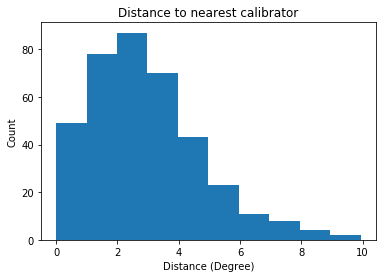

In [8]:
fig = plt.figure()
plt.hist([i[0][1] for h,i in srcs.items()])
plt.xlabel('Distance (Degree)')
plt.ylabel('Count')
plt.title('Distance to nearest calibrator')
plt.show()
plt.close(fig)

In [9]:
# Number of unique calibrators
unique = [ i for h,i in srcs.items()]
unique = list(set([ j[0] for h, i in srcs.items() for j in i ]))
print('Number of unique secondaries: ', len(unique))


Number of unique secondaries:  401


### Selecting secondaries

The basic method of selecting secondaries is going to be two fold. 

Step 1 - involves starting from the sources with the fewest available calibrators. We will add a calibrator to the program schedule only if the source requires it to be added. That is to say, if a sources has 4 potential calibrators, but the third one (in terms of distance) is already in the program schedule, we will use that. We will make note that there were two other potential calibrators that could have been used. 

Step 2 - perform another pass over all sources to see if they have any other potential calibrators. We will see if they have since been added to the program schedule. If they have, we will modify the structure so that they are removed from the assigned calibrator in step 1 and place it in the more preferred calibrator. 

In [10]:
program_cal = defaultdict(list)

sorted_srcs = sorted( srcs.items(), key=lambda v: len(v[1]) ) 
force_dist = 10

for source, calibrator in sorted_srcs:
    # if calibrator is of length 1 we have to add it
    if len(calibrator) == 1:
        attach = {'Name': source, 'Distance':calibrator[0][1], 'Competing': []}
        program_cal[calibrator[0][0]].append(attach)
    
    # if not, loop through the calibrator list to see if something is there
    else:
        competing = []
        for c in calibrator:
            if c[0] in program_cal.keys() and c[1] < force_dist:
                attach = {'Name': source, 'Distance':c[1], 'Competing': competing}
                program_cal[c[0]].append(attach)
                break
            else:
                competing.append(c)
        # If we looped through all potential calibrators and none
        # were added, we have to add it. Perform the best one to that
        # source
        else:
            print('None were present, so attaching the most preferred')
            # Pop the first in competing because we will be attaching it there anyway
            cal_name, cal_dist = calibrator[0]
            print('\t', cal_name, cal_dist)
            competing.pop(0)
            attach = {'Name': source, 'Distance':cal_dist, 'Competing': competing}
            program_cal[cal_name].append(attach)

None were present, so attaching the most preferred
	 j0044-8422 1.35
None were present, so attaching the most preferred
	 j0452-8535 3.01
None were present, so attaching the most preferred
	 0355-669 9.93
None were present, so attaching the most preferred
	 j0723-8247 1.27
None were present, so attaching the most preferred
	 2353-686 8.62
None were present, so attaching the most preferred
	 0235-618 3.85
None were present, so attaching the most preferred
	 j1934-8711 2.33
None were present, so attaching the most preferred
	 0327-241 9.13
None were present, so attaching the most preferred
	 1057-797 2.21
None were present, so attaching the most preferred
	 0220-349 5.87
None were present, so attaching the most preferred
	 1953-325 0.88
None were present, so attaching the most preferred
	 0229-398 5.84
None were present, so attaching the most preferred
	 0332-403 4.8
None were present, so attaching the most preferred
	 j2041-7515 7.31
None were present, so attaching the most preferred
	 

In [12]:
# Attach initial calibrators to sources. 
data['Initial_Calibrator'] = ''
for calibrator, sources in program_cal.items():
      for s in sources:
        data.loc[data[pos_cols[2]]==s['Name'],'Initial_Calibrator'] = calibrator
        
print(data[[pos_cols[2],'Initial_Calibrator']])  

          FSCNAME Initial_Calibrator
0    F01388-4618          j0136-4044
1    F21200-5145          j2135-5006
2    F11230-3641            1101-325
3    F06206-6315          j0715-6829
4    F21130-4446          j2049-4020
5    F23389-6139            2353-686
6    F20592-5633          j2056-5820
7    F05190-3928            0602-424
8    F20227-6950          j2041-7515
9    F02364-4751            0229-398
10   F03481-4012            0332-403
11   F00089-6901            2353-686
12   F03542-4620            0332-403
13   F02593-5800            0235-618
14   F13252-4039          j1308-4352
15   F03044-3932            0332-403
16   F23400-8705          j0044-8422
17   F20445-6218          j1940-6527
18   F03556-6300            0355-669
19   F03107-5259            0252-549
20   F04063-3236            0400-319
21   F04223-5251          j0425-5331
22   F23177-6754            2353-686
23   F22454-7100            2353-686
24   F06009-7716          j0723-8247
25   F22537-6512            2353-686
2

In [13]:
print('Number of unique calibrators: ', len(data['Initial_Calibrator'].unique()))

Number of unique calibrators:  47


In [17]:
def map_label_deg(deg, flip=True):
    """Concatenates the degree sign on the end of a value.
    """
    _deg = (360-deg) % 360 if flip else deg
    return _deg

def make_sky_plot(ax, data, data_key):
    '''A container to make a sky plot of the sources and 
    their associated secondaries
    '''
    marker = itertools.cycle(('<', '^','v', '.', 'o')) 

    # define gridlines
    parallels = np.arange(-80, 0, 20)  # i.e. Dec (deg)
    meridians = np.arange(0, 360, 30)  # i.e. RA (deg)

    m = Basemap(projection='ortho', lon_0=0, lat_0=-90, ax=ax)
    m.drawparallels(parallels)  # labelling parallels not supported for ortho projection
    m.drawmeridians(meridians, labels=[True,True,False,False], fmt=map_label_deg, fontsize='large')
    m.drawmapboundary()

    # plot Dec labels manually
    #for parallel in parallels:
    #     plt.text(*m(150, parallel), map_label_deg(parallel), fontsize='large', bbox=dict(facecolor='white', alpha=0.75, linewidth=0))
    #    ax.text(*m(240, parallel), map_label_deg(parallel, flip=False), fontsize='large', bbox=dict(facecolor='white', alpha=0.25, linewidth=0))

    # plot background image
    m.warpimage('CHIPASS.png')
    np.random.seed(0)
    data.sort_values(data_key, inplace=True)

    for unique in data[data_key].unique():
        sub = data[data[data_key]==unique]
        coords = SkyCoord(ra=sub[pos_cols[0]], dec=sub[pos_cols[1]], unit='deg,deg')

        marker_color = np.random.rand(1,3)
        # transform sky coords and plot catalogue
        x, y = m(360-coords.ra.deg, coords.dec.deg)
        m.scatter(x, y, marker=next(marker), zorder=8, c=marker_color)    

        crd=SkyCoord(db_cals[unique].getRightAscension(),db_cals[unique].getDeclination(),unit=(u.hourangle,u.degree))
        xc, yc = m(360-crd.ra.deg, crd.dec.deg)
        m.scatter(xc, yc, marker='*', zorder=8, color=marker_color, edgecolor='black')

        for src_x, src_y in zip(x,y):
            m.plot([src_x, xc],[src_y, yc], color=marker_color[0])


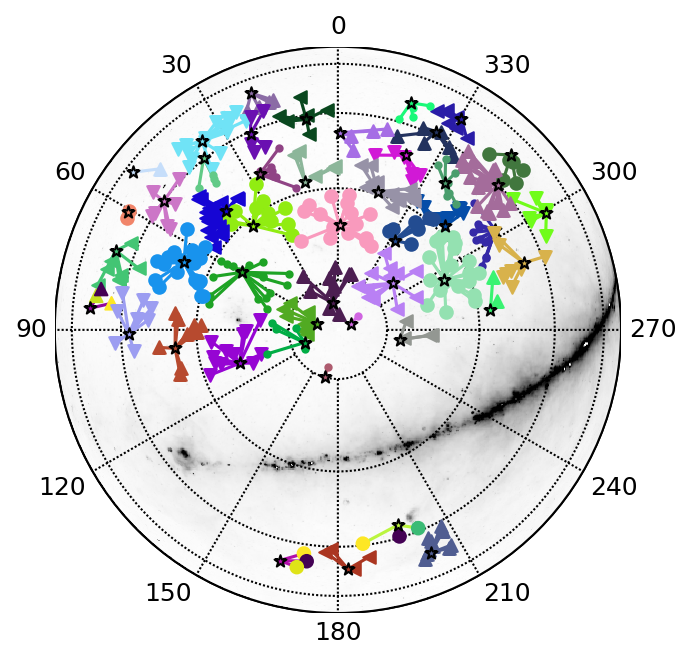

In [18]:

fig, ax = plt.subplots(1,1,figsize=(5, 5), dpi=150)
# fig = plt.figure(figsize=(5,5))

make_sky_plot(ax, data, 'Initial_Calibrator')

plt.show()
# plt.savefig('Initial_Secondaries.pdf')
plt.close(fig)

### Step 2

Step two will involve trying to consolidate the sources

In [19]:
def generate_action(prune_cals):
    action = []

    # Loop over each calibrator and find things to update
    for cal, cal_sources in prune_cals.items():
        for source in cal_sources:
            new_dist, append_item = 1000, None
            for check_cal in source['Competing']:
                if check_cal[0] in prune_cals.keys() and check_cal[1] < min(source['Distance'], new_dist):
                    new_dist = check_cal[1]
                    append_item = {'Name':source['Name'], 'Current':cal, 'Update': check_cal[0]}
            if append_item is not None:
                action.append(append_item)


    # Force update for objects with only one attached source
    for cal, cal_sources in prune_cals.items():
        if len(cal_sources)  == 1:
#             print('Single Source....', cal_sources[0]['Name'])
#             print(cal_sources[0]['Competing'])

            for check_cal in cal_sources[0]['Competing']:
                if check_cal[0] in prune_cals.keys() and check_cal[0] != cal:
#                     print(check_cal[1],  cal_sources[0]['Distance'])
#                     print(check_cal[0],  cal)

                    new_dist = check_cal[1]
                    action.append({'Name':cal_sources[0]['Name'], 'Current':cal, 'Update': check_cal[0]})
                    break
#                 else:
#                     print('\tNot in keys ', check_cal[0])

    return action

def apply_action(action, prune_cals):
    for item in action:
#         print('Source: ', item['Name'])
#         print('\tLocating index in competing....', item['Update'])
        record = prune_cals[item['Current']]

        # Horrid, horrid use of list comphrensions. Should put them into
        # the action object
        index = [ i for i, elem in enumerate(record) if elem['Name'] == item['Name'] ][0]
        cal_index = [ i for i, elem in enumerate(record[index]['Competing']) if elem[0] == item['Update']][0]

#         print('\tIndex is ', index)
#         print('\tUpdate calibrator is ', item['Update'])
#         print('\tDistance is ', record[index]['Competing'][cal_index])
        new_record = {'Name':item['Name'], 'Distance': record[index]['Competing'][cal_index][1], 'Competing':[]}
#         print('\t', new_record)
        prune_cals[item['Update']].append(new_record)
        prune_cals[item['Current']].pop(index)

    return prune_cals

In [20]:
import copy

prune_cals = copy.deepcopy(program_cal)

max_attempts = 3
i = 0

while True:
    print('Prune stage ', i)
    action = generate_action(prune_cals)
    if len(action) > 0:
        prune_cals = apply_action(action, prune_cals)
        i += 1
    elif i == max_attempts:
        print('Max attempts reached. breaking')
        break
    else:
        print('No actions could be applied')
        break

Prune stage  0
Prune stage  1
No actions could be applied


In [21]:
# Attach initial calibrators to sources. 
data['Final_Calibrator'] = ''
for calibrator, sources in prune_cals.items():
      for s in sources:
        data.loc[data[pos_cols[2]]==s['Name'],'Final_Calibrator'] = calibrator
        data.loc[data[pos_cols[2]]==s['Name'],'Final_Calibrator_Dist'] = s['Distance']
        
print(data[[pos_cols[2],'Final_Calibrator','Final_Calibrator_Dist']])  

          FSCNAME Final_Calibrator  Final_Calibrator_Dist
182  F00535-5043          0047-579                   7.23
217  F00311-5701          0047-579                   2.41
293  F00469-4958          0047-579                   7.94
106  F00012-5451          0047-579                   7.14
254  F00042-5521          0047-579                   6.51
65   F01281-3317          0118-272                   6.38
247  F01050-3305          0118-272                   6.47
347  F01158-3339          0118-272                   6.39
93   F01009-3241          0118-272                   6.58
111  F02124-4128          0229-398                   3.70
183  F02193-3553          0220-349                   1.01
193  F01590-3158          0220-349                   5.42
343  F02169-3437          0220-349                   0.85
88   F02361-3233          0220-349                   3.97
328  F02403-3740          0229-398                   2.96
185  F01325-3623        j0136-4044                   4.62
309  F01550-37

Number of unique, final calibrators:  45
Number of isolated sources:  0
Number of matched sources:  375


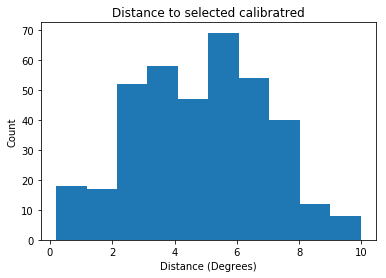

In [22]:
print('Number of unique, final calibrators: ', len(data['Final_Calibrator'].unique()))
print('Number of isolated sources: ', data[data['Final_Calibrator']==''].shape[0])
print('Number of matched sources: ', data[data['Final_Calibrator']!=''].shape[0])
fig = plt.figure()
plt.hist(data['Final_Calibrator_Dist'])
plt.xlabel('Distance (Degrees)')
plt.ylabel('Count')
plt.title('Distance to selected calibratred')
plt.show()
plt.close(fig)

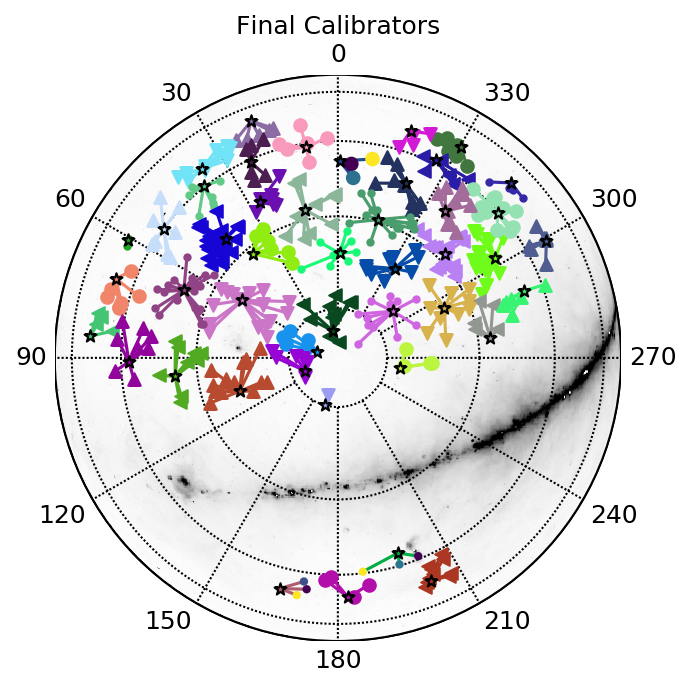

In [23]:

fig, ax = plt.subplots(1,1,figsize=(5, 5), dpi=150)
# fig = plt.figure(figsize=(5,5))

make_sky_plot(ax, data, 'Final_Calibrator')
ax.set_title('Final Calibrators', y=1.05)

plt.show()
# plt.savefig('Final_Secondaries.pdf')
plt.close(fig)

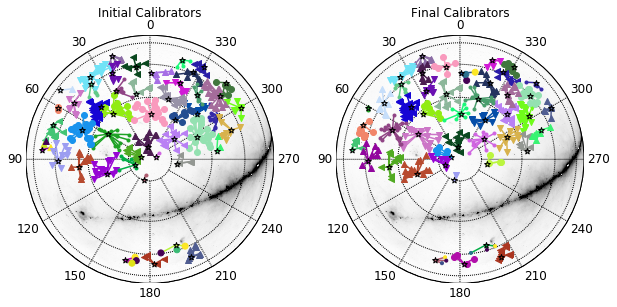

In [24]:

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 10))
# fig = plt.figure(figsize=(5,5))

make_sky_plot(ax1, data, 'Initial_Calibrator')
ax1.set_title('Initial Calibrators', y=1.05)

make_sky_plot(ax2, data, 'Final_Calibrator')
ax2.set_title('Final Calibrators', y=1.05)

plt.subplots_adjust(wspace=.25)
plt.show()
# plt.savefig('Final_Initial_Secondaries.pdf')
plt.close(fig)

In [25]:
#save the results
data.to_csv('output.csv')
import pickle

pickle.dump(db_cals,open('caldb.dat','wb'))

## Do travelling salesman to determine schedules

The `ejc_source` class represents a source for ease of use.

`group_sources(cal,srcs,length)` groups the `srcs` view of the master dataframe into at most `length` size runs that have a calibrator in-between them.

Then a schedule file is written that starts with a pointing scan and then goes on to do each source in turn.

As we have already worked out the schedule I dont attach calibrators to each scan, but put the calibrator scans in the file directly.

This code should do something sensible for all lengths. I currently for multiples of 3 drop to groups of 3, otherwise I use groups of 4, but this could probably be tuned a bit more. 
#UPdate for lists of length 2 it does not add calibrator at end of file!



In [26]:
import cabb_scheduler as cs
import os
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2



out_dir = 'Schedule_Files'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
## these read the data back in, coz profiler needs selfcontained cell
#data=pd.read_csv('output.csv')
#db_cals=pickle.load(open('caldb.dat','rb'))

class ejc_source:
    def __init__(self,name,ra,dec,units=(u.hourangle,u.degree),isCal=False,):
        self.__name=name
        #self.__ra=ra
        #self.__dec=dec
        self.__cal=isCal
        #print(ra,dec)
        self.position=sk.SkyCoord(ra=ra,dec=dec,unit=units)
    def __str__(self):
        if self.__cal:
            return self.__name + 'C'
            #return "%sC %s"%(self.__name, self.position.to_string('hmsdms',fields=3,sep=':').replace(' ',','))
        else:
            return self.__name
            #return "%s %s"%(self.__name, self.position.to_string('hmsdms',fields=3,sep=':'))
    def __repr__(self):
        return self.__str__()
    def getName(self):
            return self.__name
    def ra(self):
        return self.position.ra
    def dec(self):
        return self.position.dec
    def is_cal(self):
        return self.__cal

In [33]:
#### ORtools magic that does the vehicle routing problem!
import math
class CreateDistanceCallback(object):
  """Create callback to calculate distances between points."""

  def __init__(self, locations):
    """Initialize distance array."""
    size = len(locations)
    print(locations)
    self.matrix = {}

    for from_node in range(size):
      self.matrix[from_node] = {}
      for to_node in range(size):
        from_ = locations[from_node]
        #print(type(from_))
        to = locations[to_node]
        self.matrix[from_node][to_node] = from_.position.separation(to.position).value

  def Distance(self, from_node, to_node):
    return self.matrix[from_node][to_node]

# Demand callback
class CreateDemandCallback(object):
  """Create callback to get demands at each location."""


  def __init__(self, demands):
    self.matrix = demands

  def Demand(self, from_node, to_node):
    return self.matrix[from_node]

def group_sources2(calibrator,sources,num_stops):
  # Create the data.
  calibrator=ejc_source(calibrator,
                        db_cals[calibrator].getRightAscension(),
                        db_cals[calibrator].getDeclination(),
                        isCal=True)
  sources=[ejc_source( s[pos_cols[2]], s[pos_cols[0]], s[pos_cols[1]], units='deg,deg') for i,s in sources.iterrows() ]
  means=[sk.Angle(np.mean([s.ra().degree for s in sources]),u.degree).to_string(u.hourangle),
           sk.Angle(np.mean([s.dec().degree for s in sources]),u.degree)]
  #print(sources)
  locations = create_data_array(calibrator,sources)
  #print(locations)
  ## as all are equal just set depot to zero others to 1
  demands = [0] + [1]*(len(locations)-1)
  #print(demands)
  
  num_locations = len(locations)
  depot = 0    # The depot is the start and end point of each route.
  num_vehicles = math.ceil(num_locations/float(num_stops))
  #print(num_vehicles)
  
  # Create routing model.
  if num_locations > 0:
    routing = pywrapcp.RoutingModel(num_locations, num_vehicles, depot)
    search_parameters = pywrapcp.RoutingModel.DefaultSearchParameters()

    # Callback to the distance function.
    dist_between_locations = CreateDistanceCallback(locations)
    dist_callback = dist_between_locations.Distance
    routing.SetArcCostEvaluatorOfAllVehicles(dist_callback)

    # Put a callback to the demands.
    demands_at_locations = CreateDemandCallback(demands)
    demands_callback = demands_at_locations.Demand

    # Add a dimension for demand.
    slack_max = 0
    vehicle_capacity = num_stops
    fix_start_cumul_to_zero = True
    demand = "Demand"
    routing.AddDimension(demands_callback, slack_max, vehicle_capacity,
                         fix_start_cumul_to_zero, demand)
    
    # Solve, displays a solution if any.
    assignment = routing.SolveWithParameters(search_parameters)
    if assignment:
      # Display solution.
      # Solution cost.
      print ("Total distance of all routes: " + str(assignment.ObjectiveValue()) + "\n")
      route_list=[]
      for vehicle_nbr in range(num_vehicles):
        index = routing.Start(vehicle_nbr)
        index_next = assignment.Value(routing.NextVar(index))
        route = ''
        route_dist = 0
        route_demand = 0
        
        while not routing.IsEnd(index_next):
          node_index = routing.IndexToNode(index)
          node_index_next = routing.IndexToNode(index_next)
          route += str(locations[node_index]) + " -> "
          route_list.append(locations[node_index])
          # Add the distance to the next node.
          route_dist += dist_callback(node_index, node_index_next)
          # Add demand.
          route_demand += demands[node_index_next]
          index = index_next
          index_next = assignment.Value(routing.NextVar(index))
          

        node_index = routing.IndexToNode(index)
        node_index_next = routing.IndexToNode(index_next)
        route += str(locations[node_index]) + " -> " + str(locations[node_index_next])
        route_list.append(locations[node_index])
        route_dist += dist_callback(node_index, node_index_next)
        print ("Route for vehicle " + str(vehicle_nbr) + ":\n\n" + route + "\n")
        print ("Distance of route " + str(vehicle_nbr) + ": " + str(route_dist))
        print ("Demand met by vehicle " + str(vehicle_nbr) + ": " + str(route_demand) + "\n")
        print(route_list)
    else:
      print ('No solution found.')
    route_list.append(locations[0])#whack the calibrator back on the end
    xv=[ s.ra().radian for s in route_list ]
    yv=[ s.dec().radian for s in route_list ]
    
    plt.plot(xv,yv,'.-')
    plt.plot(xv[0],yv[0],'*',markersize=10)
    plt.show()


    return route_list,means
  else:
    print ('Specify an instance greater than 0.')
    return None
def create_data_array(calibrator,sources):

  locations = [calibrator]+sources
  return locations

Group for 0047-579

Length: 10
Calibrator: 0047-579
Schedule File: 0047-579.sch
[0047-579C, F00535-5043 , F01032-5842 , F01025-6423 , F00090-6201 , F01315-6224 , F00503-6315 , F00311-5701 , F00042-5521 , F00469-4958 , F00012-5451 ]
Total distance of all routes: 49

Route for vehicle 0:

0047-579C -> F00469-4958  -> F00535-5043  -> 0047-579C

Distance of route 0: 16.451025067704443
Demand met by vehicle 0: 2

[0047-579C, F00469-4958 , F00535-5043 ]
Route for vehicle 1:

0047-579C -> F00503-6315  -> F01025-6423  -> F01315-6224  -> F01032-5842  -> 0047-579C

Distance of route 1: 18.170939752158738
Demand met by vehicle 1: 4

[0047-579C, F00469-4958 , F00535-5043 , 0047-579C, F00503-6315 , F01025-6423 , F01315-6224 , F01032-5842 ]
Route for vehicle 2:

0047-579C -> F00311-5701  -> F00012-5451  -> F00042-5521  -> F00090-6201  -> 0047-579C

Distance of route 2: 20.836689234476697
Demand met by vehicle 2: 4

[0047-579C, F00469-4958 , F00535-5043 , 0047-579C, F00503-6315 , F01025-6423 , F01315

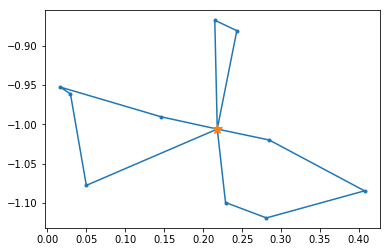

Total schedule time: 41 mins



Group for 0118-272

Length: 5
Calibrator: 0118-272
Schedule File: 0118-272.sch
[0118-272C, F01281-3317 , F01379-3203 , F01050-3305 , F01009-3241 , F01158-3339 ]
Total distance of all routes: 28

Route for vehicle 0:

0118-272C -> F01281-3317  -> F01379-3203  -> 0118-272C

Distance of route 0: 15.223274593141605
Demand met by vehicle 0: 2

[0118-272C, F01281-3317 , F01379-3203 ]
Route for vehicle 1:

0118-272C -> F01158-3339  -> F01050-3305  -> F01009-3241  -> 0118-272C

Distance of route 1: 16.25980612952874
Demand met by vehicle 1: 3

[0118-272C, F01281-3317 , F01379-3203 , 0118-272C, F01158-3339 , F01050-3305 , F01009-3241 ]


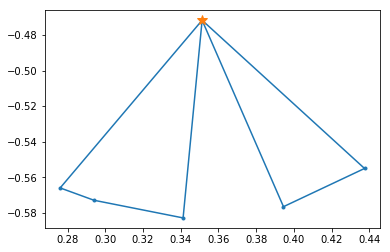

Total schedule time: 24 mins



Group for 0220-349

Length: 10
Calibrator: 0220-349
Schedule File: 0220-349.sch
[0220-349C, F02169-3437 , F02437-3131 , F01469-3352 , F01478-3241 , F02391-3522 , F01550-3706 , F01590-3158 , F02361-3233 , F01531-3534 , F02193-3553 ]
Total distance of all routes: 35

Route for vehicle 0:

0220-349C -> F01590-3158  -> F01478-3241  -> F01469-3352  -> F02193-3553  -> 0220-349C

Distance of route 0: 17.0304804602264
Demand met by vehicle 0: 4

[0220-349C, F01590-3158 , F01478-3241 , F01469-3352 , F02193-3553 ]
Route for vehicle 1:

0220-349C -> F02169-3437  -> F01531-3534  -> F01550-3706  -> 0220-349C

Distance of route 1: 13.046181075927969
Demand met by vehicle 1: 3

[0220-349C, F01590-3158 , F01478-3241 , F01469-3352 , F02193-3553 , 0220-349C, F02169-3437 , F01531-3534 , F01550-3706 ]
Route for vehicle 2:

0220-349C -> F02361-3233  -> F02437-3131  -> F02391-3522  -> 0220-349C

Distance of route 2: 13.635650312046813
Demand met by vehicle 2: 3

[0220-349C, F

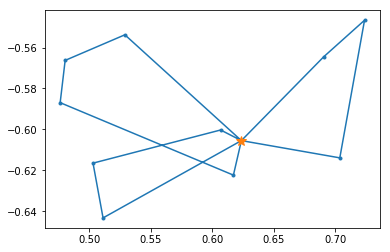

Total schedule time: 41 mins



Group for 0229-398

Length: 7
Calibrator: 0229-398
Schedule File: 0229-398.sch
[0229-398C, F02307-4402 , F02336-4536 , F02124-4128 , F02356-4628 , F02556-4532 , F02403-3740 , F02476-3858 ]
Total distance of all routes: 28

Route for vehicle 0:

0229-398C -> F02307-4402  -> F02336-4536  -> F02356-4628  -> F02556-4532  -> 0229-398C

Distance of route 0: 17.834863640800688
Demand met by vehicle 0: 4

[0229-398C, F02307-4402 , F02336-4536 , F02356-4628 , F02556-4532 ]
Route for vehicle 1:

0229-398C -> F02403-3740  -> F02476-3858  -> F02124-4128  -> 0229-398C

Distance of route 1: 15.736926050427499
Demand met by vehicle 1: 3

[0229-398C, F02307-4402 , F02336-4536 , F02356-4628 , F02556-4532 , 0229-398C, F02403-3740 , F02476-3858 , F02124-4128 ]


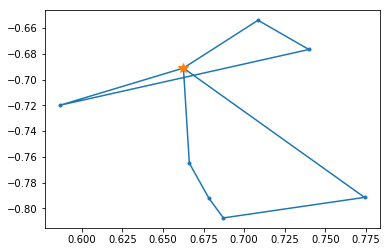

Total schedule time: 30 mins



Group for 0235-618

Length: 6
Calibrator: 0235-618
Schedule File: 0235-618.sch
[0235-618C, F02049-6320 , F02019-6128 , F02138-5902 , F01400-6551 , F01588-5825 , F01419-6826 ]
Total distance of all routes: 28

Route for vehicle 0:

0235-618C -> F02049-6320  -> F01400-6551  -> F01419-6826  -> 0235-618C

Distance of route 0: 18.763445828459616
Demand met by vehicle 0: 3

[0235-618C, F02049-6320 , F01400-6551 , F01419-6826 ]
Route for vehicle 1:

0235-618C -> F02138-5902  -> F01588-5825  -> F02019-6128  -> 0235-618C

Distance of route 1: 12.990768108247163
Demand met by vehicle 1: 3

[0235-618C, F02049-6320 , F01400-6551 , F01419-6826 , 0235-618C, F02138-5902 , F01588-5825 , F02019-6128 ]


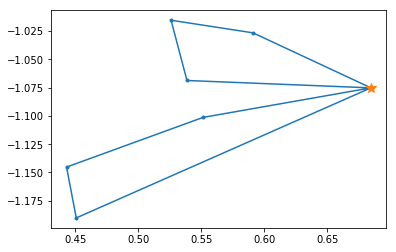

Total schedule time: 27 mins



Group for 0252-549

Length: 23
Calibrator: 0252-549
Schedule File: 0252-549.sch
[0252-549C, F03049-5127 , F03013-5212 , F03164-5737 , F03035-4823 , F02364-4751 , F03024-4716 , F03293-5444 , F03137-5500 , F03230-5800 , F02287-5418 , F03109-5131 , F03139-5610 , F03189-5316 , F03335-5625 , F03068-5346 , F03058-4726 , F03107-5259 , F02482-5235 , F02283-5439 , F02593-5800 , F03014-5629 , F02419-5625 , F03175-5227 ]
Total distance of all routes: 61

Route for vehicle 0:

0252-549C -> F03035-4823  -> F03058-4726  -> F03024-4716  -> F02364-4751  -> 0252-549C

Distance of route 0: 20.25468309662997
Demand met by vehicle 0: 4

[0252-549C, F03035-4823 , F03058-4726 , F03024-4716 , F02364-4751 ]
Route for vehicle 1:

0252-549C -> F03164-5737  -> F03230-5800  -> F03335-5625  -> F03293-5444  -> 0252-549C

Distance of route 1: 14.600610843239862
Demand met by vehicle 1: 4

[0252-549C, F03035-4823 , F03058-4726 , F03024-4716 , F02364-4751 , 0252-549C, F03164-5737 , F032

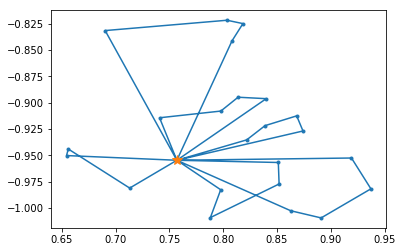

Total schedule time: 86 mins



Group for 0332-403

Length: 8
Calibrator: 0332-403
Schedule File: 0332-403.sch
[0332-403C, F03481-4012 , F03044-3932 , F03278-4329 , F03531-4507 , F03542-4620 , F03313-3530 , F03092-3217 , F03517-3950 ]
Total distance of all routes: 43

Route for vehicle 0:

0332-403C -> 0332-403C

Distance of route 0: 0.0
Demand met by vehicle 0: 0

[0332-403C]
Route for vehicle 1:

0332-403C -> F03531-4507  -> F03542-4620  -> F03278-4329  -> F03044-3932  -> 0332-403C

Distance of route 1: 24.184071566108663
Demand met by vehicle 1: 4

[0332-403C, 0332-403C, F03531-4507 , F03542-4620 , F03278-4329 , F03044-3932 ]
Route for vehicle 2:

0332-403C -> F03481-4012  -> F03517-3950  -> F03313-3530  -> F03092-3217  -> 0332-403C

Distance of route 2: 24.5703860288869
Demand met by vehicle 2: 4

[0332-403C, 0332-403C, F03531-4507 , F03542-4620 , F03278-4329 , F03044-3932 , 0332-403C, F03481-4012 , F03517-3950 , F03313-3530 , F03092-3217 ]


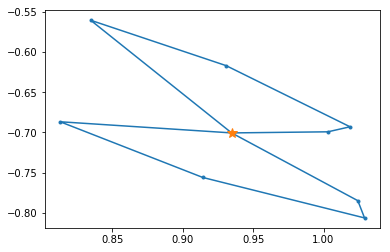

Total schedule time: 35 mins



Group for 0355-669

Length: 17
Calibrator: 0355-669
Schedule File: 0355-669.sch
[0355-669C, F04549-7453 , F03360-6716 , F03147-7620 , F03538-6432 , F03561-6611 , F04061-7421 , F03576-6132 , F03556-6300 , F04264-7400 , F05000-6208 , F02439-7455 , F05140-6217 , F03380-7113 , F03385-7119 , F03117-6916 , F04270-6125 , F04366-7234 ]
Total distance of all routes: 73

Route for vehicle 0:

0355-669C -> F04366-7234  -> F04549-7453  -> F04264-7400  -> F04061-7421  -> 0355-669C

Distance of route 0: 20.352730516067567
Demand met by vehicle 0: 4

[0355-669C, F04366-7234 , F04549-7453 , F04264-7400 , F04061-7421 ]
Route for vehicle 1:

0355-669C -> F03576-6132  -> F04270-6125  -> F05000-6208  -> F05140-6217  -> 0355-669C

Distance of route 1: 24.039898866549727
Demand met by vehicle 1: 4

[0355-669C, F04366-7234 , F04549-7453 , F04264-7400 , F04061-7421 , 0355-669C, F03576-6132 , F04270-6125 , F05000-6208 , F05140-6217 ]
Route for vehicle 2:

0355-669C -> F03117-691

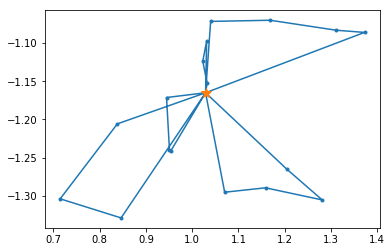

Total schedule time: 66 mins



Group for 0400-319

Length: 2
Calibrator: 0400-319
Schedule File: 0400-319.sch
[0400-319C, F04063-3236 , F03594-3149 ]
Total distance of all routes: 2

Route for vehicle 0:

0400-319C -> F03594-3149  -> F04063-3236  -> 0400-319C

Distance of route 0: 3.339911280393749
Demand met by vehicle 0: 2

[0400-319C, F03594-3149 , F04063-3236 ]


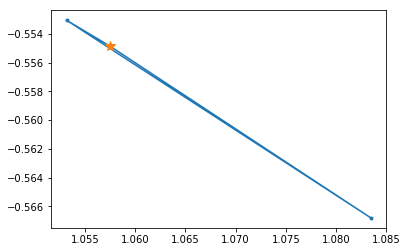

Total schedule time: 13 mins



Group for 0439-337

Length: 7
Calibrator: 0439-337
Schedule File: 0439-337.sch
[0439-337C, F04498-4239 , F04502-3304 , F05059-3734 , F04273-3735 , F05011-3758 , F05067-3743 , F04589-3241 ]
Total distance of all routes: 35

Route for vehicle 0:

0439-337C -> F05011-3758  -> F04498-4239  -> F04273-3735  -> 0439-337C

Distance of route 0: 22.40776657844237
Demand met by vehicle 0: 3

[0439-337C, F05011-3758 , F04498-4239 , F04273-3735 ]
Route for vehicle 1:

0439-337C -> F04502-3304  -> F04589-3241  -> F05067-3743  -> F05059-3734  -> 0439-337C

Distance of route 1: 16.2071319569896
Demand met by vehicle 1: 4

[0439-337C, F05011-3758 , F04498-4239 , F04273-3735 , 0439-337C, F04502-3304 , F04589-3241 , F05067-3743 , F05059-3734 ]


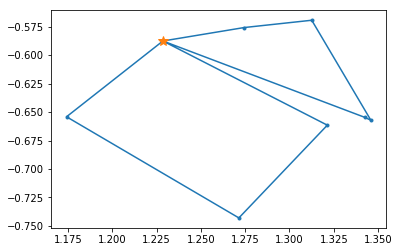

Total schedule time: 30 mins



Group for 0537-286

Length: 4
Calibrator: 0537-286
Schedule File: 0537-286.sch
[0537-286C, F05314-3625 , F05189-3200 , F05260-3029 , F05156-3024 ]
Total distance of all routes: 18

Route for vehicle 0:

0537-286C -> 0537-286C

Distance of route 0: 0.0
Demand met by vehicle 0: 0

[0537-286C]
Route for vehicle 1:

0537-286C -> F05260-3029  -> F05156-3024  -> F05189-3200  -> F05314-3625  -> 0537-286C

Distance of route 1: 20.14162756031735
Demand met by vehicle 1: 4

[0537-286C, 0537-286C, F05260-3029 , F05156-3024 , F05189-3200 , F05314-3625 ]


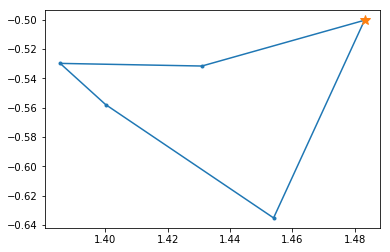

Total schedule time: 21 mins



Group for 0602-424

Length: 8
Calibrator: 0602-424
Schedule File: 0602-424.sch
[0602-424C, F05324-4827 , F06219-4330 , F05190-3928 , F05463-4450 , F05392-3839 , F06116-3802 , F05471-4746 , F05238-4602 ]
Total distance of all routes: 41

Route for vehicle 0:

0602-424C -> 0602-424C

Distance of route 0: 0.0
Demand met by vehicle 0: 0

[0602-424C]
Route for vehicle 1:

0602-424C -> F06219-4330  -> F06116-3802  -> F05392-3839  -> F05190-3928  -> 0602-424C

Distance of route 1: 28.58194906247634
Demand met by vehicle 1: 4

[0602-424C, 0602-424C, F06219-4330 , F06116-3802 , F05392-3839 , F05190-3928 ]
Route for vehicle 2:

0602-424C -> F05463-4450  -> F05471-4746  -> F05324-4827  -> F05238-4602  -> 0602-424C

Distance of route 2: 20.01493628378326
Demand met by vehicle 2: 4

[0602-424C, 0602-424C, F06219-4330 , F06116-3802 , F05392-3839 , F05190-3928 , 0602-424C, F05463-4450 , F05471-4746 , F05324-4827 , F05238-4602 ]


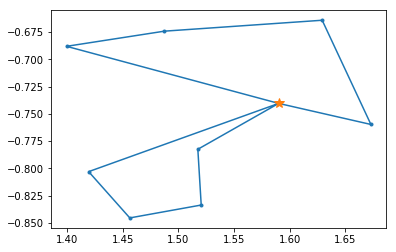

Total schedule time: 35 mins



Group for 1057-797

Length: 1
Calibrator: 1057-797
Schedule File: 1057-797.sch
[1057-797C, F10577-8200 ]
Total distance of all routes: 4

Route for vehicle 0:

1057-797C -> F10577-8200  -> 1057-797C

Distance of route 0: 4.41465878678678
Demand met by vehicle 0: 1

[1057-797C, F10577-8200 ]


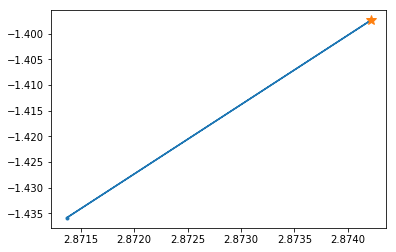

Total schedule time: 10 mins



Group for 1101-325

Length: 3
Calibrator: 1101-325
Schedule File: 1101-325.sch
[1101-325C, F11230-3641 , F11267-3410 , F11182-3127 ]
Total distance of all routes: 14

Route for vehicle 0:

1101-325C -> F11182-3127  -> F11267-3410  -> F11230-3641  -> 1101-325C

Distance of route 0: 15.783105319589893
Demand met by vehicle 0: 3

[1101-325C, F11182-3127 , F11267-3410 , F11230-3641 ]


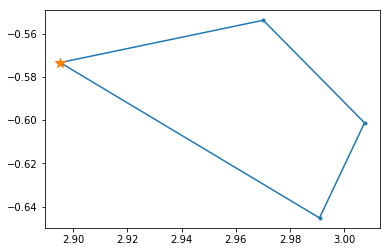

Total schedule time: 16 mins



Group for 1207-319

Length: 4
Calibrator: 1207-319
Schedule File: 1207-319.sch
[1207-319C, F12131-3142 , F11506-3851 , F11445-3755 , F12285-3539 ]
Total distance of all routes: 22

Route for vehicle 0:

1207-319C -> 1207-319C

Distance of route 0: 0.0
Demand met by vehicle 0: 0

[1207-319C]
Route for vehicle 1:

1207-319C -> F12131-3142  -> F12285-3539  -> F11506-3851  -> F11445-3755  -> 1207-319C

Distance of route 1: 23.61604275892737
Demand met by vehicle 1: 4

[1207-319C, 1207-319C, F12131-3142 , F12285-3539 , F11506-3851 , F11445-3755 ]


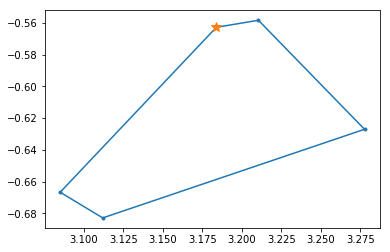

Total schedule time: 21 mins



Group for 1327-311

Length: 10
Calibrator: 1327-311
Schedule File: 1327-311.sch
[1327-311C, F13476-3811 , F13240-3108 , F13454-2956 , F13482-3032 , F13311-3635 , F13478-3630 , F13318-3312 , F13321-3514 , F13203-2939 , F13273-3232 ]
Total distance of all routes: 29

Route for vehicle 0:

1327-311C -> F13478-3630  -> F13476-3811  -> F13311-3635  -> F13321-3514  -> 1327-311C

Distance of route 0: 17.752084472850484
Demand met by vehicle 0: 4

[1327-311C, F13478-3630 , F13476-3811 , F13311-3635 , F13321-3514 ]
Route for vehicle 1:

1327-311C -> F13240-3108  -> F13203-2939  -> F13454-2956  -> F13482-3032  -> 1327-311C

Distance of route 1: 13.244279652921897
Demand met by vehicle 1: 4

[1327-311C, F13478-3630 , F13476-3811 , F13311-3635 , F13321-3514 , 1327-311C, F13240-3108 , F13203-2939 , F13454-2956 , F13482-3032 ]
Route for vehicle 2:

1327-311C -> F13318-3312  -> F13273-3232  -> 1327-311C

Distance of route 2: 4.826027143705199
Demand met by vehicle 2: 2

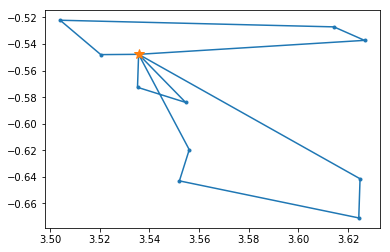

Total schedule time: 41 mins



Group for 1953-325

Length: 7
Calibrator: 1953-325
Schedule File: 1953-325.sch
[1953-325C, F19544-3829 , F19546-3229 , F19582-3833 , F19568-3157 , F19573-3240 , F19336-3632 , F20117-3249 ]
Total distance of all routes: 18

Route for vehicle 0:

1953-325C -> F19336-3632  -> F19544-3829  -> F19582-3833  -> F20117-3249  -> 1953-325C

Distance of route 0: 21.196666270631454
Demand met by vehicle 0: 4

[1953-325C, F19336-3632 , F19544-3829 , F19582-3833 , F20117-3249 ]
Route for vehicle 1:

1953-325C -> F19568-3157  -> F19546-3229  -> F19573-3240  -> 1953-325C

Distance of route 1: 2.9402636211430293
Demand met by vehicle 1: 3

[1953-325C, F19336-3632 , F19544-3829 , F19582-3833 , F20117-3249 , 1953-325C, F19568-3157 , F19546-3229 , F19573-3240 ]


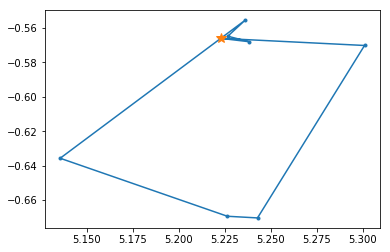

Total schedule time: 30 mins



Group for 2005-489

Length: 17
Calibrator: 2005-489
Schedule File: 2005-489.sch
[2005-489C, F20244-5151 , F20308-4750 , F20065-5325 , F19473-4958 , F20205-4409 , F20031-4935 , F19592-5221 , F20085-5430 , F20193-5405 , F20425-4901 , F19410-5422 , F20272-4738 , F20001-5253 , F20203-5206 , F19318-5607 , F20486-4857 , F19393-5441 ]
Total distance of all routes: 57

Route for vehicle 0:

2005-489C -> F20205-4409  -> 2005-489C

Distance of route 0: 10.891808076851614
Demand met by vehicle 0: 1

[2005-489C, F20205-4409 ]
Route for vehicle 1:

2005-489C -> F19473-4958  -> F19410-5422  -> F19393-5441  -> F19318-5607  -> 2005-489C

Distance of route 1: 18.639289548835556
Demand met by vehicle 1: 4

[2005-489C, F20205-4409 , 2005-489C, F19473-4958 , F19410-5422 , F19393-5441 , F19318-5607 ]
Route for vehicle 2:

2005-489C -> F20272-4738  -> F20308-4750  -> F20425-4901  -> F20486-4857  -> 2005-489C

Distance of route 2: 14.755171461497127
Demand met by vehicle 2: 4


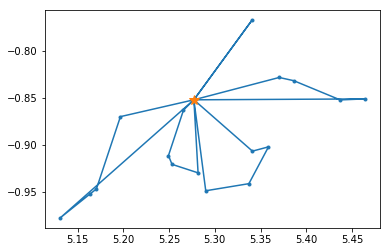

Total schedule time: 66 mins



Group for 2058-297

Length: 4
Calibrator: 2058-297
Schedule File: 2058-297.sch
[2058-297C, F20401-3032 , F20520-3117 , F21144-3515 , F20562-3159 ]
Total distance of all routes: 17

Route for vehicle 0:

2058-297C -> 2058-297C

Distance of route 0: 0.0
Demand met by vehicle 0: 0

[2058-297C]
Route for vehicle 1:

2058-297C -> F20520-3117  -> F20401-3032  -> F20562-3159  -> F21144-3515  -> 2058-297C

Distance of route 1: 19.90363036602251
Demand met by vehicle 1: 4

[2058-297C, 2058-297C, F20520-3117 , F20401-3032 , F20562-3159 , F21144-3515 ]


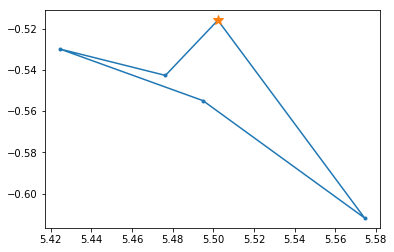

Total schedule time: 21 mins



Group for 2155-304

Length: 7
Calibrator: 2155-304
Schedule File: 2155-304.sch
[2155-304C, F22192-3211 , F21413-3535 , F21553-3432 , F22055-3421 , F22111-3100 , F22115-3013 , F21598-3047 ]
Total distance of all routes: 23

Route for vehicle 0:

2155-304C -> F22055-3421  -> F21553-3432  -> F21413-3535  -> 2155-304C

Distance of route 0: 15.522303853735158
Demand met by vehicle 0: 3

[2155-304C, F22055-3421 , F21553-3432 , F21413-3535 ]
Route for vehicle 1:

2155-304C -> F21598-3047  -> F22115-3013  -> F22111-3100  -> F22192-3211  -> 2155-304C

Distance of route 1: 11.640777328184594
Demand met by vehicle 1: 4

[2155-304C, F22055-3421 , F21553-3432 , F21413-3535 , 2155-304C, F21598-3047 , F22115-3013 , F22111-3100 , F22192-3211 ]


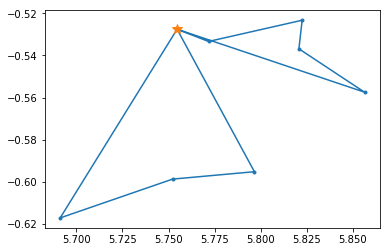

Total schedule time: 30 mins



Group for 2211-388

Length: 6
Calibrator: 2211-388
Schedule File: 2211-388.sch
[2211-388C, F21330-3846 , F22255-3922 , F21426-4254 , F22185-4338 , F21518-4104 , F22069-3809 ]
Total distance of all routes: 27

Route for vehicle 0:

2211-388C -> F21518-4104  -> F21426-4254  -> F21330-3846  -> F22069-3809  -> 2211-388C

Distance of route 0: 19.218258375547755
Demand met by vehicle 0: 4

[2211-388C, F21518-4104 , F21426-4254 , F21330-3846 , F22069-3809 ]
Route for vehicle 1:

2211-388C -> F22255-3922  -> F22185-4338  -> 2211-388C

Distance of route 1: 12.180572891689769
Demand met by vehicle 1: 2

[2211-388C, F21518-4104 , F21426-4254 , F21330-3846 , F22069-3809 , 2211-388C, F22255-3922 , F22185-4338 ]


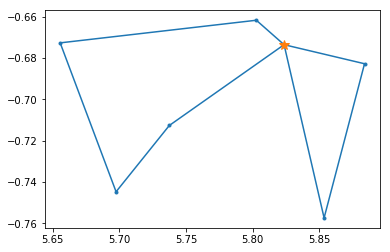

Total schedule time: 27 mins



Group for 2232-488

Length: 9
Calibrator: 2232-488
Schedule File: 2232-488.sch
[2232-488C, F22467-4906 , F23023-4322 , F22489-4432 , F22336-4925 , F22101-5314 , F22053-5158 , F22145-5246 , F23087-5107 , F22110-5422 ]
Total distance of all routes: 32

Route for vehicle 0:

2232-488C -> F22489-4432  -> F23023-4322  -> F23087-5107  -> F22467-4906  -> 2232-488C

Distance of route 0: 22.171641628460534
Demand met by vehicle 0: 4

[2232-488C, F22489-4432 , F23023-4322 , F23087-5107 , F22467-4906 ]
Route for vehicle 1:

2232-488C -> F22145-5246  -> F22101-5314  -> F22110-5422  -> F22053-5158  -> 2232-488C

Distance of route 1: 14.58271292992912
Demand met by vehicle 1: 4

[2232-488C, F22489-4432 , F23023-4322 , F23087-5107 , F22467-4906 , 2232-488C, F22145-5246 , F22101-5314 , F22110-5422 , F22053-5158 ]
Route for vehicle 2:

2232-488C -> F22336-4925  -> 2232-488C

Distance of route 2: 1.207707642412703
Demand met by vehicle 2: 1

[2232-488C, F22489-4432 , F230

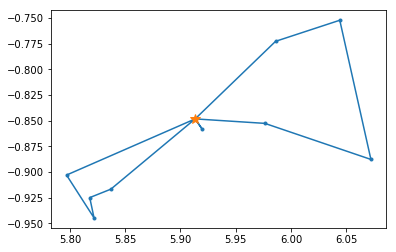

Total schedule time: 38 mins



Group for 2245-328

Length: 4
Calibrator: 2245-328
Schedule File: 2245-328.sch
[2245-328C, F22521-3929 , F22275-3125 , F22420-3428 , F22396-3726 ]
Total distance of all routes: 19

Route for vehicle 0:

2245-328C -> 2245-328C

Distance of route 0: 0.0
Demand met by vehicle 0: 0

[2245-328C]
Route for vehicle 1:

2245-328C -> F22420-3428  -> F22521-3929  -> F22396-3726  -> F22275-3125  -> 2245-328C

Distance of route 1: 21.0267589819784
Demand met by vehicle 1: 4

[2245-328C, 2245-328C, F22420-3428 , F22521-3929 , F22396-3726 , F22275-3125 ]


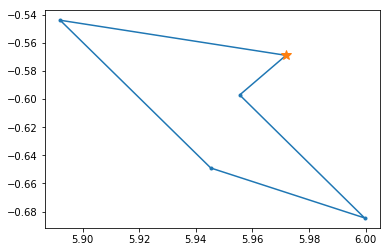

Total schedule time: 21 mins



Group for 2353-686

Length: 8
Calibrator: 2353-686
Schedule File: 2353-686.sch
[2353-686C, F00089-6901 , F23177-6754 , F23413-6330 , F00183-7111 , F23320-6540 , F01297-7022 , F00333-6550 , F23321-7013 ]
Total distance of all routes: 36

Route for vehicle 0:

2353-686C -> 2353-686C

Distance of route 0: 0.0
Demand met by vehicle 0: 0

[2353-686C]
Route for vehicle 1:

2353-686C -> F23320-6540  -> F23413-6330  -> F00333-6550  -> F01297-7022  -> 2353-686C

Distance of route 1: 27.461377955528384
Demand met by vehicle 1: 4

[2353-686C, 2353-686C, F23320-6540 , F23413-6330 , F00333-6550 , F01297-7022 ]
Route for vehicle 2:

2353-686C -> F00089-6901  -> F00183-7111  -> F23321-7013  -> F23177-6754  -> 2353-686C

Distance of route 2: 13.72645074561937
Demand met by vehicle 2: 4

[2353-686C, 2353-686C, F23320-6540 , F23413-6330 , F00333-6550 , F01297-7022 , 2353-686C, F00089-6901 , F00183-7111 , F23321-7013 , F23177-6754 ]


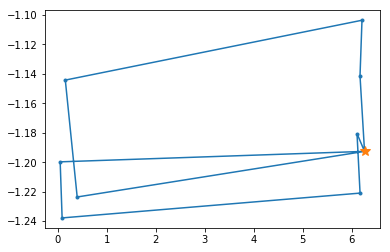

Total schedule time: 35 mins



Group for j0034-4116

Length: 6
Calibrator: j0034-4116
Schedule File: j0034-4116.sch
[j0034-4116C, F00344-3349 , F00596-3847 , F00308-4559 , F00091-3905 , F00522-4059 , F00298-4012 ]
Total distance of all routes: 33

Route for vehicle 0:

j0034-4116C -> F00298-4012  -> F00308-4559  -> j0034-4116C

Distance of route 0: 11.601763547854747
Demand met by vehicle 0: 2

[j0034-4116C, F00298-4012 , F00308-4559 ]
Route for vehicle 1:

j0034-4116C -> F00522-4059  -> F00596-3847  -> F00344-3349  -> F00091-3905  -> j0034-4116C

Distance of route 1: 25.866579317326725
Demand met by vehicle 1: 4

[j0034-4116C, F00298-4012 , F00308-4559 , j0034-4116C, F00522-4059 , F00596-3847 , F00344-3349 , F00091-3905 ]


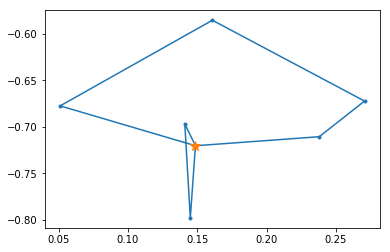

Total schedule time: 27 mins



Group for j0044-8422

Length: 10
Calibrator: j0044-8422
Schedule File: j0044-8422.sch
[j0044-8422C, F02123-7713 , F00333-8156 , F00072-7730 , F02228-8036 , F01348-8526 , F23129-7842 , F23047-7838 , F00392-7930 , F23400-8705 , F00198-8123 ]
Total distance of all routes: 37

Route for vehicle 0:

j0044-8422C -> F01348-8526  -> F23400-8705  -> j0044-8422C

Distance of route 0: 6.461666946521639
Demand met by vehicle 0: 2

[j0044-8422C, F01348-8526 , F23400-8705 ]
Route for vehicle 1:

j0044-8422C -> F00392-7930  -> F00072-7730  -> F23047-7838  -> F23129-7842  -> j0044-8422C

Distance of route 1: 18.19682502505448
Demand met by vehicle 1: 4

[j0044-8422C, F01348-8526 , F23400-8705 , j0044-8422C, F00392-7930 , F00072-7730 , F23047-7838 , F23129-7842 ]
Route for vehicle 2:

j0044-8422C -> F02228-8036  -> F02123-7713  -> F00198-8123  -> F00333-8156  -> j0044-8422C

Distance of route 2: 18.495322826344292
Demand met by vehicle 2: 4

[j0044-8422C, F01348-8526 , F

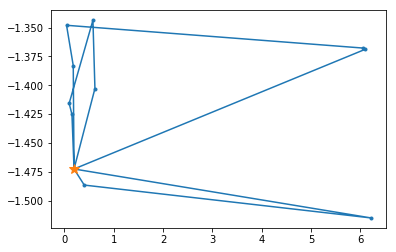

Total schedule time: 41 mins



Group for j0136-4044

Length: 6
Calibrator: j0136-4044
Schedule File: j0136-4044.sch
[j0136-4044C, F01129-3535 , F01388-4618 , F01379-4340 , F01247-4611 , F01325-3623 , F01267-3551 ]
Total distance of all routes: 24

Route for vehicle 0:

j0136-4044C -> F01325-3623  -> F01267-3551  -> F01129-3535  -> j0136-4044C

Distance of route 0: 15.509736061502082
Demand met by vehicle 0: 3

[j0136-4044C, F01325-3623 , F01267-3551 , F01129-3535 ]
Route for vehicle 1:

j0136-4044C -> F01379-4340  -> F01388-4618  -> F01247-4611  -> j0136-4044C

Distance of route 1: 13.300145891058392
Demand met by vehicle 1: 3

[j0136-4044C, F01325-3623 , F01267-3551 , F01129-3535 , j0136-4044C, F01379-4340 , F01388-4618 , F01247-4611 ]


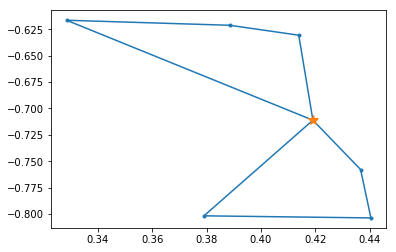

Total schedule time: 27 mins



Group for j0146-5202

Length: 7
Calibrator: j0146-5202
Schedule File: j0146-5202.sch
[j0146-5202C, F01274-5249 , F01551-5406 , F01089-4743 , F01289-5405 , F01269-5151 , F01268-5436 , F01417-5130 ]
Total distance of all routes: 21

Route for vehicle 0:

j0146-5202C -> F01269-5151  -> F01274-5249  -> F01089-4743  -> F01417-5130  -> j0146-5202C

Distance of route 0: 17.0899141892204
Demand met by vehicle 0: 4

[j0146-5202C, F01269-5151 , F01274-5249 , F01089-4743 , F01417-5130 ]
Route for vehicle 1:

j0146-5202C -> F01551-5406  -> F01268-5436  -> F01289-5405  -> j0146-5202C

Distance of route 1: 10.139308872820338
Demand met by vehicle 1: 3

[j0146-5202C, F01269-5151 , F01274-5249 , F01089-4743 , F01417-5130 , j0146-5202C, F01551-5406 , F01268-5436 , F01289-5405 ]


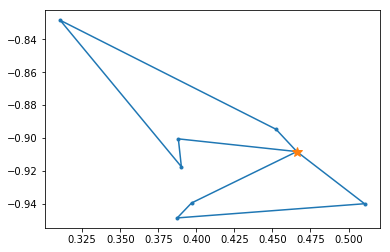

Total schedule time: 30 mins



Group for j0425-5331

Length: 20
Calibrator: j0425-5331
Schedule File: j0425-5331.sch
[j0425-5331C, F05041-4938 , F05030-6010 , F04358-4654 , F03508-5626 , F03434-5827 , F04257-4913 , F04581-4808 , F04039-5414 , F04090-5646 , F04427-5745 , F04415-5906 , F04453-5842 , F05024-6039 , F04110-5510 , F04223-5251 , F04352-4856 , F04163-5017 , F04396-5251 , F03436-5017 , F04191-5608 ]
Total distance of all routes: 74

Route for vehicle 0:

j0425-5331C -> j0425-5331C

Distance of route 0: 0.0
Demand met by vehicle 0: 0

[j0425-5331C]
Route for vehicle 1:

j0425-5331C -> F03436-5017  -> F03508-5626  -> F03434-5827  -> F04427-5745  -> j0425-5331C

Distance of route 1: 28.28628666014071
Demand met by vehicle 1: 4

[j0425-5331C, j0425-5331C, F03436-5017 , F03508-5626 , F03434-5827 , F04427-5745 ]
Route for vehicle 2:

j0425-5331C -> F04453-5842  -> F05024-6039  -> F05030-6010  -> F04415-5906  -> j0425-5331C

Distance of route 2: 18.14714423173248
Demand met by vehicl

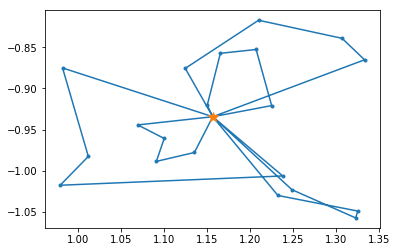

Total schedule time: 77 mins



Group for j0452-8535

Length: 5
Calibrator: j0452-8535
Schedule File: j0452-8535.sch
[j0452-8535C, F05286-8307 , F04376-7807 , F04048-7853 , F05053-7903 , F04025-8303 ]
Total distance of all routes: 18

Route for vehicle 0:

j0452-8535C -> F04025-8303  -> j0452-8535C

Distance of route 0: 5.975172908825981
Demand met by vehicle 0: 1

[j0452-8535C, F04025-8303 ]
Route for vehicle 1:

j0452-8535C -> F05286-8307  -> F05053-7903  -> F04376-7807  -> F04048-7853  -> j0452-8535C

Distance of route 1: 17.20878248295827
Demand met by vehicle 1: 4

[j0452-8535C, F04025-8303 , j0452-8535C, F05286-8307 , F05053-7903 , F04376-7807 , F04048-7853 ]


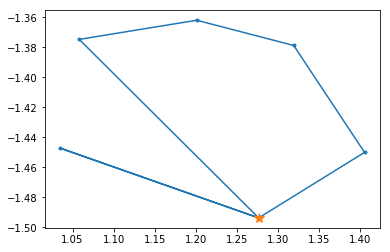

Total schedule time: 24 mins



Group for j0625-5438

Length: 9
Calibrator: j0625-5438
Schedule File: j0625-5438.sch
[j0625-5438C, F06061-5742 , F05520-5933 , F06024-6008 , F05433-5533 , F05510-6057 , F05355-5447 , F07019-5432 , F06211-5027 , F06533-5515 ]
Total distance of all routes: 43

Route for vehicle 0:

j0625-5438C -> F06211-5027  -> F05433-5533  -> F05355-5447  -> j0625-5438C

Distance of route 0: 20.273728765251953
Demand met by vehicle 0: 3

[j0625-5438C, F06211-5027 , F05433-5533 , F05355-5447 ]
Route for vehicle 1:

j0625-5438C -> F06061-5742  -> F06024-6008  -> F05510-6057  -> F05520-5933  -> j0625-5438C

Distance of route 1: 16.20505753133712
Demand met by vehicle 1: 4

[j0625-5438C, F06211-5027 , F05433-5533 , F05355-5447 , j0625-5438C, F06061-5742 , F06024-6008 , F05510-6057 , F05520-5933 ]
Route for vehicle 2:

j0625-5438C -> F06533-5515  -> F07019-5432  -> j0625-5438C

Distance of route 2: 10.960718849258095
Demand met by vehicle 2: 2

[j0625-5438C, F06211-5027 , F05

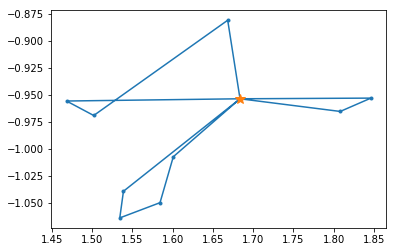

Total schedule time: 38 mins



Group for j0715-6829

Length: 13
Calibrator: j0715-6829
Schedule File: j0715-6829.sch
[j0715-6829C, F06592-6313 , F07117-7325 , F07163-7440 , F06111-7020 , F06518-6744 , F06427-6610 , F07172-6120 , F05334-7359 , F06035-7102 , F06206-6315 , F06489-6306 , F07259-7108 , F07053-6428 ]
Total distance of all routes: 56

Route for vehicle 0:

j0715-6829C -> F06111-7020  -> F06035-7102  -> F05334-7359  -> j0715-6829C

Distance of route 0: 20.396851016320408
Demand met by vehicle 0: 3

[j0715-6829C, F06111-7020 , F06035-7102 , F05334-7359 ]
Route for vehicle 1:

j0715-6829C -> F06518-6744  -> F06427-6610  -> F06206-6315  -> F06489-6306  -> j0715-6829C

Distance of route 1: 16.96070009850156
Demand met by vehicle 1: 4

[j0715-6829C, F06111-7020 , F06035-7102 , F05334-7359 , j0715-6829C, F06518-6744 , F06427-6610 , F06206-6315 , F06489-6306 ]
Route for vehicle 2:

j0715-6829C -> F07053-6428  -> F07172-6120  -> F06592-6313  -> j0715-6829C

Distance of route 2: 15.72

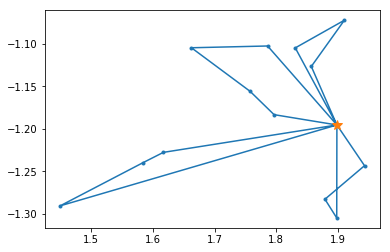

Total schedule time: 52 mins



Group for j0723-8247

Length: 6
Calibrator: j0723-8247
Schedule File: j0723-8247.sch
[j0723-8247C, F08048-8211 , F05571-8123 , F06009-7716 , F06084-8255 , F06413-8340 , F05367-7629 ]
Total distance of all routes: 18

Route for vehicle 0:

j0723-8247C -> F06084-8255  -> F05571-8123  -> F05367-7629  -> F06009-7716  -> j0723-8247C

Distance of route 0: 17.211711007840158
Demand met by vehicle 0: 4

[j0723-8247C, F06084-8255 , F05571-8123 , F05367-7629 , F06009-7716 ]
Route for vehicle 1:

j0723-8247C -> F06413-8340  -> F08048-8211  -> j0723-8247C

Distance of route 1: 5.938950068332462
Demand met by vehicle 1: 2

[j0723-8247C, F06084-8255 , F05571-8123 , F05367-7629 , F06009-7716 , j0723-8247C, F06413-8340 , F08048-8211 ]


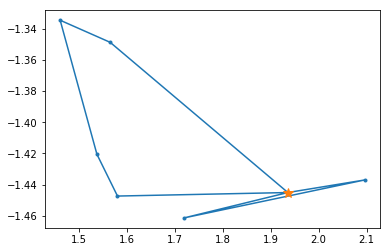

Total schedule time: 27 mins



Group for j1308-4352

Length: 3
Calibrator: j1308-4352
Schedule File: j1308-4352.sch
[j1308-4352C, F13036-4008 , F13252-4039 , F12239-4014 ]
Total distance of all routes: 23

Route for vehicle 0:

j1308-4352C -> F13252-4039  -> F13036-4008  -> F12239-4014  -> j1308-4352C

Distance of route 0: 24.829630416210748
Demand met by vehicle 0: 3

[j1308-4352C, F13252-4039 , F13036-4008 , F12239-4014 ]


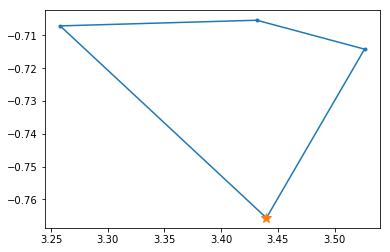

Total schedule time: 16 mins



Group for j1723-7713

Length: 4
Calibrator: j1723-7713
Schedule File: j1723-7713.sch
[j1723-7713C, F17261-7622 , F17414-7036 , F17403-7055 , F18220-7555 ]
Total distance of all routes: 13

Route for vehicle 0:

j1723-7713C -> j1723-7713C

Distance of route 0: 0.0
Demand met by vehicle 0: 0

[j1723-7713C]
Route for vehicle 1:

j1723-7713C -> F18220-7555  -> F17403-7055  -> F17414-7036  -> F17261-7622  -> j1723-7713C

Distance of route 1: 16.948217994260308
Demand met by vehicle 1: 4

[j1723-7713C, j1723-7713C, F18220-7555 , F17403-7055 , F17414-7036 , F17261-7622 ]


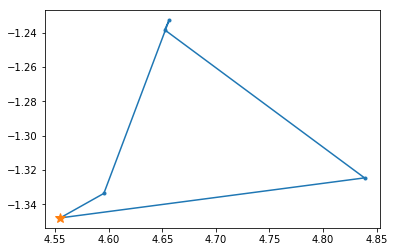

Total schedule time: 21 mins



Group for j1829-5705

Length: 5
Calibrator: j1829-5705
Schedule File: j1829-5705.sch
[j1829-5705C, F18527-6025 , F19242-5734 , F18432-6024 , F19112-5444 , F18365-5507 ]
Total distance of all routes: 22

Route for vehicle 0:

j1829-5705C -> F18365-5507  -> j1829-5705C

Distance of route 0: 5.090200151577731
Demand met by vehicle 0: 1

[j1829-5705C, F18365-5507 ]
Route for vehicle 1:

j1829-5705C -> F18432-6024  -> F18527-6025  -> F19242-5734  -> F19112-5444  -> j1829-5705C

Distance of route 1: 20.36475051580637
Demand met by vehicle 1: 4

[j1829-5705C, F18365-5507 , j1829-5705C, F18432-6024 , F18527-6025 , F19242-5734 , F19112-5444 ]


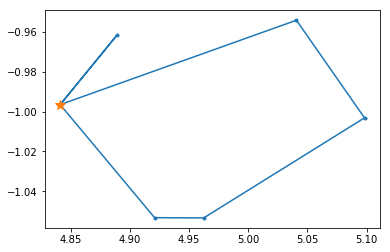

Total schedule time: 24 mins



Group for j1919-4543

Length: 6
Calibrator: j1919-4543
Schedule File: j1919-4543.sch
[j1919-4543C, F19092-5121 , F19098-4707 , F19067-5215 , F18520-5048 , F19119-4952 , F19146-3919 ]
Total distance of all routes: 27

Route for vehicle 0:

j1919-4543C -> F19146-3919  -> F19098-4707  -> j1919-4543C

Distance of route 0: 15.987975138091885
Demand met by vehicle 0: 2

[j1919-4543C, F19146-3919 , F19098-4707 ]
Route for vehicle 1:

j1919-4543C -> F19119-4952  -> F19092-5121  -> F19067-5215  -> F18520-5048  -> j1919-4543C

Distance of route 1: 15.667422666636371
Demand met by vehicle 1: 4

[j1919-4543C, F19146-3919 , F19098-4707 , j1919-4543C, F19119-4952 , F19092-5121 , F19067-5215 , F18520-5048 ]


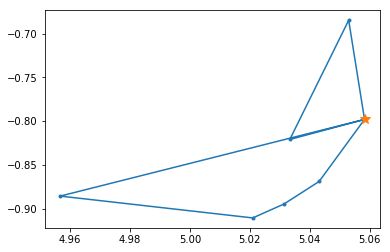

Total schedule time: 27 mins



Group for j1940-6527

Length: 11
Calibrator: j1940-6527
Schedule File: j1940-6527.sch
[j1940-6527C, F19156-6308 , F19292-5953 , F19482-6821 , F20294-6552 , F19548-6237 , F19167-6024 , F19462-5843 , F19211-6715 , F18318-6718 , F19327-6555 , F18575-7052 ]
Total distance of all routes: 45

Route for vehicle 0:

j1940-6527C -> F19156-6308  -> F18318-6718  -> F18575-7052  -> F19211-6715  -> j1940-6527C

Distance of route 0: 20.116438957605308
Demand met by vehicle 0: 4

[j1940-6527C, F19156-6308 , F18318-6718 , F18575-7052 , F19211-6715 ]
Route for vehicle 1:

j1940-6527C -> F19548-6237  -> F19462-5843  -> F19292-5953  -> F19167-6024  -> j1940-6527C

Distance of route 1: 17.332826400216664
Demand met by vehicle 1: 4

[j1940-6527C, F19156-6308 , F18318-6718 , F18575-7052 , F19211-6715 , j1940-6527C, F19548-6237 , F19462-5843 , F19292-5953 , F19167-6024 ]
Route for vehicle 2:

j1940-6527C -> F19327-6555  -> F19482-6821  -> F20294-6552  -> j1940-6527C

Distance 

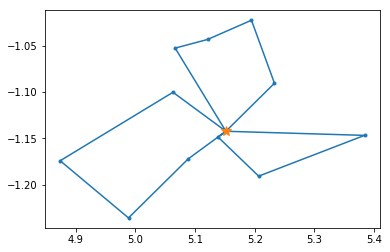

Total schedule time: 44 mins



Group for j2041-7515

Length: 12
Calibrator: j2041-7515
Schedule File: j2041-7515.sch
[j2041-7515C, F21008-8111 , F21539-7643 , F20227-6950 , F20353-8039 , F20519-7319 , F21131-7339 , F19254-7245 , F21302-8006 , F19102-7714 , F22169-8029 , F20568-7450 , F20050-8508 ]
Total distance of all routes: 53

Route for vehicle 0:

j2041-7515C -> j2041-7515C

Distance of route 0: 0.0
Demand met by vehicle 0: 0

[j2041-7515C]
Route for vehicle 1:

j2041-7515C -> F19254-7245  -> F19102-7714  -> F20050-8508  -> F20353-8039  -> j2041-7515C

Distance of route 1: 27.958451181943317
Demand met by vehicle 1: 4

[j2041-7515C, j2041-7515C, F19254-7245 , F19102-7714 , F20050-8508 , F20353-8039 ]
Route for vehicle 2:

j2041-7515C -> F21539-7643  -> F22169-8029  -> F21302-8006  -> F21008-8111  -> j2041-7515C

Distance of route 2: 18.28970324478199
Demand met by vehicle 2: 4

[j2041-7515C, j2041-7515C, F19254-7245 , F19102-7714 , F20050-8508 , F20353-8039 , j2041-7515C, F21539-

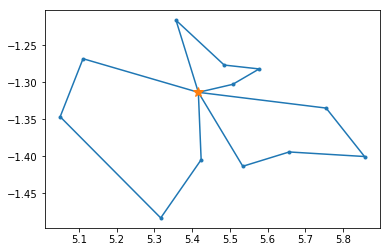

Total schedule time: 49 mins



Group for j2049-4020

Length: 11
Calibrator: j2049-4020
Schedule File: j2049-4020.sch
[j2049-4020C, F21023-4258 , F21001-3807 , F20227-4105 , F20345-3539 , F20596-3743 , F20591-4514 , F20236-3946 , F21222-4020 , F20551-4250 , F20312-4400 , F20455-3810 ]
Total distance of all routes: 40

Route for vehicle 0:

j2049-4020C -> F20312-4400  -> F20227-4105  -> F20236-3946  -> F20345-3539  -> j2049-4020C

Distance of route 0: 19.052916860324494
Demand met by vehicle 0: 4

[j2049-4020C, F20312-4400 , F20227-4105 , F20236-3946 , F20345-3539 ]
Route for vehicle 1:

j2049-4020C -> F21222-4020  -> F21023-4258  -> F20591-4514  -> F20551-4250  -> j2049-4020C

Distance of route 1: 19.184587363289083
Demand met by vehicle 1: 4

[j2049-4020C, F20312-4400 , F20227-4105 , F20236-3946 , F20345-3539 , j2049-4020C, F21222-4020 , F21023-4258 , F20591-4514 , F20551-4250 ]
Route for vehicle 2:

j2049-4020C -> F20455-3810  -> F20596-3743  -> F21001-3807  -> j2049-4020C

Distance 

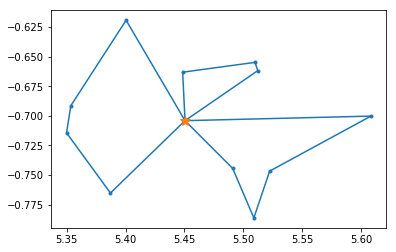

Total schedule time: 44 mins



Group for j2056-5820

Length: 17
Calibrator: j2056-5820
Schedule File: j2056-5820.sch
[j2056-5820C, F20486-5303 , F21355-5813 , F20561-5344 , F20592-5633 , F21093-5838 , F20564-5755 , F20559-5251 , F20575-5250 , F21510-5757 , F21201-5931 , F20431-6133 , F21139-5904 , F20445-6218 , F20162-6003 , F20443-6023 , F20213-5910 , F20317-5832 ]
Total distance of all routes: 45

Route for vehicle 0:

j2056-5820C -> F20564-5755  -> j2056-5820C

Distance of route 0: 1.5810613200421588
Demand met by vehicle 0: 1

[j2056-5820C, F20564-5755 ]
Route for vehicle 1:

j2056-5820C -> F20445-6218  -> F20431-6133  -> F21355-5813  -> F21510-5757  -> j2056-5820C

Distance of route 1: 21.805966937154228
Demand met by vehicle 1: 4

[j2056-5820C, F20564-5755 , j2056-5820C, F20445-6218 , F20431-6133 , F21355-5813 , F21510-5757 ]
Route for vehicle 2:

j2056-5820C -> F20486-5303  -> F20559-5251  -> F20575-5250  -> F20561-5344  -> j2056-5820C

Distance of route 2: 12.617884836728349
D

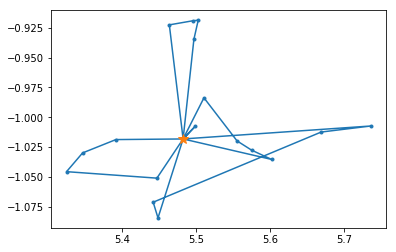

Total schedule time: 66 mins



Group for j2135-5006

Length: 10
Calibrator: j2135-5006
Schedule File: j2135-5006.sch
[j2135-5006C, F21200-5145 , F21480-4439 , F21199-5243 , F21292-4953 , F21316-4217 , F21038-5234 , F21295-4634 , F21274-4322 , F21130-4446 , F21522-4717 ]
Total distance of all routes: 36

Route for vehicle 0:

j2135-5006C -> F21130-4446  -> F21274-4322  -> F21316-4217  -> F21295-4634  -> j2135-5006C

Distance of route 0: 18.771282309860258
Demand met by vehicle 0: 4

[j2135-5006C, F21130-4446 , F21274-4322 , F21316-4217 , F21295-4634 ]
Route for vehicle 1:

j2135-5006C -> F21522-4717  -> F21480-4439  -> j2135-5006C

Distance of route 1: 13.550186883364429
Demand met by vehicle 1: 2

[j2135-5006C, F21130-4446 , F21274-4322 , F21316-4217 , F21295-4634 , j2135-5006C, F21522-4717 , F21480-4439 ]
Route for vehicle 2:

j2135-5006C -> F21292-4953  -> F21200-5145  -> F21199-5243  -> F21038-5234  -> j2135-5006C

Distance of route 2: 11.287972952251554
Demand met by vehicle 2: 4


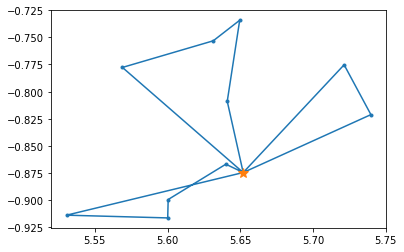

Total schedule time: 41 mins



Group for j2150-6802

Length: 9
Calibrator: j2150-6802
Schedule File: j2150-6802.sch
[j2150-6802C, F21138-6642 , F21341-6212 , F22069-6707 , F22006-6621 , F22481-7028 , F21510-7143 , F22454-7100 , F22294-7147 , F21223-6308 ]
Total distance of all routes: 28

Route for vehicle 0:

j2150-6802C -> F21510-7143  -> F22294-7147  -> F22454-7100  -> F22481-7028  -> j2150-6802C

Distance of route 0: 14.413210935724868
Demand met by vehicle 0: 4

[j2150-6802C, F21510-7143 , F22294-7147 , F22454-7100 , F22481-7028 ]
Route for vehicle 1:

j2150-6802C -> F21138-6642  -> F21223-6308  -> F21341-6212  -> j2150-6802C

Distance of route 1: 14.979985083584364
Demand met by vehicle 1: 3

[j2150-6802C, F21510-7143 , F22294-7147 , F22454-7100 , F22481-7028 , j2150-6802C, F21138-6642 , F21223-6308 , F21341-6212 ]
Route for vehicle 2:

j2150-6802C -> F22006-6621  -> F22069-6707  -> j2150-6802C

Distance of route 2: 5.660000478482223
Demand met by vehicle 2: 2

[j2150-6802C, F21

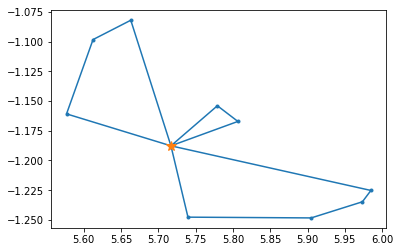

Total schedule time: 38 mins



Group for j2254-5926

Length: 15
Calibrator: j2254-5926
Schedule File: j2254-5926.sch
[j2254-5926C, F22087-5613 , F23122-5355 , F21594-5714 , F23128-5919 , F23047-5752 , F22574-5734 , F22290-5913 , F22537-6512 , F22149-5951 , F22041-5742 , F22191-6001 , F21547-5824 , F22218-6155 , F23389-6139 , F23253-5415 ]
Total distance of all routes: 52

Route for vehicle 0:

j2254-5926C -> F23047-5752  -> F23253-5415  -> F23122-5355  -> F22574-5734  -> j2254-5926C

Distance of route 0: 15.481485550010206
Demand met by vehicle 0: 4

[j2254-5926C, F23047-5752 , F23253-5415 , F23122-5355 , F22574-5734 ]
Route for vehicle 1:

j2254-5926C -> F22087-5613  -> F21547-5824  -> F21594-5714  -> F22041-5742  -> j2254-5926C

Distance of route 1: 18.16058641067295
Demand met by vehicle 1: 4

[j2254-5926C, F23047-5752 , F23253-5415 , F23122-5355 , F22574-5734 , j2254-5926C, F22087-5613 , F21547-5824 , F21594-5714 , F22041-5742 ]
Route for vehicle 2:

j2254-5926C -> F23128-5919  ->

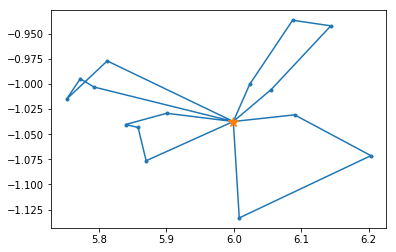

Total schedule time: 58 mins



Group for j2358-4555

Length: 3
Calibrator: j2358-4555
Schedule File: j2358-4555.sch
[j2358-4555C, F23378-5038 , F23414-4654 , F23177-4448 ]
Total distance of all routes: 17

Route for vehicle 0:

j2358-4555C -> F23414-4654  -> F23378-5038  -> F23177-4448  -> j2358-4555C

Distance of route 0: 19.766309960267606
Demand met by vehicle 0: 3

[j2358-4555C, F23414-4654 , F23378-5038 , F23177-4448 ]


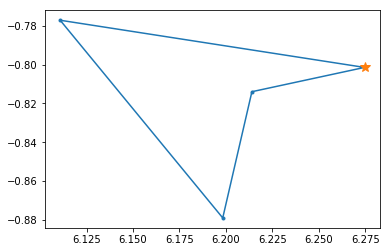

Total schedule time: 16 mins



    Calibrator                             filename length         Mean_RA  \
0     0047-579    Schedule_Files/C3221-0047-579.sch     10   0h43m36.0729s   
1     0118-272    Schedule_Files/C3221-0118-272.sch      5   1h19m54.7084s   
2     0220-349    Schedule_Files/C3221-0220-349.sch     10   2h13m53.9448s   
3     0229-398    Schedule_Files/C3221-0229-398.sch      7   2h38m30.2034s   
4     0235-618    Schedule_Files/C3221-0235-618.sch      6    1h58m25.303s   
5     0252-549    Schedule_Files/C3221-0252-549.sch     23   3h05m43.6258s   
6     0332-403    Schedule_Files/C3221-0332-403.sch      8   3h36m48.5506s   
7     0355-669    Schedule_Files/C3221-0355-669.sch     17   4h01m50.6361s   
8     0400-319    Schedule_Files/C3221-0400-319.sch      2    4h04m50.364s   
9     0439-337    Schedule_Files/C3221-0439-337.sch      7   4h56m03.4053s   
10    0537-286    Schedule_Files/C3221-0537-286.sch      4   5h24m53.9589s   
11    0602-424    Schedule_Files

In [34]:
### This loop gets each unique calibrator and writes a *hopefully* optimal schedule file 
### for it, we add schedule scans directly as we already have an order!
schedule_data=pd.DataFrame(columns=['Calibrator','filename','length', 'Mean_RA','Mean_DEC','time','order'])
for cal in data['Final_Calibrator'].unique():
    details={}
    sub = data[data['Final_Calibrator']==cal]
    print('Group for %s\n=============================================\n'%cal)
    details['Calibrator']=cal
    details['filename']='%s/C3221-%s.sch'%(out_dir,cal)
    details['length']=len(sub)
    print("Length:",len(sub)) 
    print("Calibrator:",cal)
    print("Schedule File: %s.sch"%cal)
    #if len(sub)%3 == 0:
    #best,means=group_sources(cal,sub,3)
    best,means=group_sources2(cal,sub,4)
    #else:
    #    best=group_sources(cal,sub,4)
    details['Mean_RA']=means[0]
    details['Mean_DEC']=means[1]
    
    sched=cs.schedule()
    sched.disablePriorCalibration()
    sched.setLooping(False)
    ## This does a pointing scan at the start of the schedule block
    sched.addScan({'source': best[0].getName(),
                      'rightAscension': best[0].position.ra.to_string(u.hourangle,fields=3,sep=':'),
                      'declination': best[0].position.dec.to_string(u.degree,fields=3,sep=':'),
                      'freq1':33000,
                      'freq2':35000,
                      'project':"C3221",
                      'scanLength': "00:03:00",
                      'scanType':'Point',
                      'pointing':'Update',
                      'observer':'TJG',
                      'calCode':'C'
                  })
    sched_time=3
    for s in best:
        opts={        'rightAscension': s.position.ra.to_string(u.hourangle,fields=3,sep=':'),
                      'declination': s.position.dec.to_string(u.degree,fields=3,sep=':'),
                      'scanType':'Dwell',
                      'pointing':'Offpnt',                   
             }
        if len(s.getName()) > 10 and s.getName().startswith('F'):
            opts['source']=s.getName()[1:].strip()
        else:
            opts['source']=s.getName()
        if s.is_cal():
            opts['calCode']='C'
            opts['scanLength']="00:02:00"
            sched_time+=2
        else:
            opts['scanLength']="00:03:00"
            sched_time+=3
        #print(opts)
        sched.addScan(opts)
    #print(sched.toString())
    sched.write('%s/C3221-%s.sch'%(out_dir, best[0].getName()))
    print("Total schedule time:",sched_time,'mins')
    details['time']=sched_time
    details['order']=best
    schedule_data=schedule_data.append(details,ignore_index=True)
    
    
    print("\n\n")
print(schedule_data)
schedule_data.to_csv('%s/Schedule_summary.csv'%out_dir)

    Calibrator                             filename length         Mean_RA  \
0     0047-579    Schedule_Files/C3221-0047-579.sch     10   0h43m36.0729s   
1     0118-272    Schedule_Files/C3221-0118-272.sch      5   1h19m54.7084s   
2     0220-349    Schedule_Files/C3221-0220-349.sch     10   2h13m53.9448s   
3     0229-398    Schedule_Files/C3221-0229-398.sch      7   2h38m30.2034s   
4     0235-618    Schedule_Files/C3221-0235-618.sch      6    1h58m25.303s   
5     0252-549    Schedule_Files/C3221-0252-549.sch     23   3h05m43.6258s   
6     0332-403    Schedule_Files/C3221-0332-403.sch      8   3h36m48.5506s   
7     0355-669    Schedule_Files/C3221-0355-669.sch     17   4h01m50.6361s   
8     0400-319    Schedule_Files/C3221-0400-319.sch      2    4h04m50.364s   
9     0439-337    Schedule_Files/C3221-0439-337.sch      7   4h56m03.4053s   
10    0537-286    Schedule_Files/C3221-0537-286.sch      4   5h24m53.9589s   
11    0602-424    Schedule_Files/C3221-0602-424.sch      8   5h4